In [31]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet), maxlen = 30)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet), maxlen = 30)

print("X_train, X_test", X_train.shape, X_test.shape)

labels = train_data.label.unique().tolist()

X_train, X_test (1273862, 30) (318466, 30)


In [32]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1273862, 1)
y_test shape: (318466, 1)


[[123460  36033]
 [ 38830 120143]]


<AxesSubplot:>

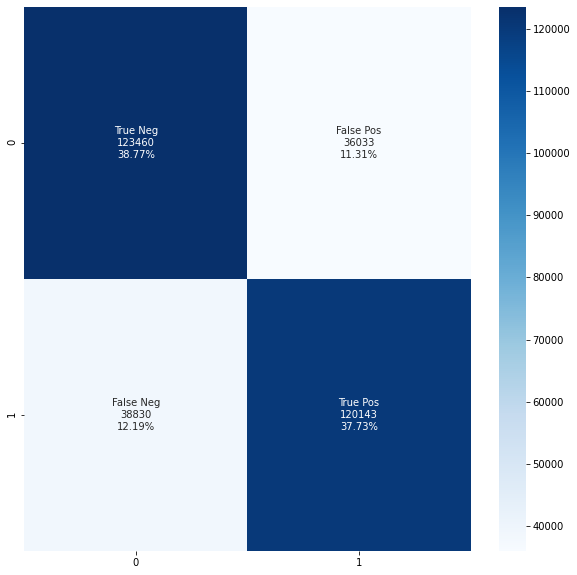

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

cf_matrix = confusion_matrix(test_data['label'], y_prediction)
print(cf_matrix)

plt.figure(figsize = (10,10))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [40]:
print(classification_report(test_data['label'], y_prediction))

              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77    159493
    Positive       0.77      0.76      0.76    158973

    accuracy                           0.76    318466
   macro avg       0.77      0.76      0.76    318466
weighted avg       0.77      0.76      0.76    318466



In [43]:
tfidf_test_vec = tfidf_vectorizer.transform(test_data['tweet'])

### Training - DBScan TFIDF

In [44]:
tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(tfidf_vec, train_data['label'])


MultinomialNB()

In [45]:
y_prediction = tfidf_classifier.predict(tfidf_test_vec)
score = (tfidf_classifier.score(tfidf_test_vec, test_data['label'])) * 100
print("tf-idf Näive_Bayes score = " + str(score) + "%")

tf-idf Näive_Bayes score = 75.89475799614401%


[[122167  37326]
 [ 39441 119532]]


<AxesSubplot:>

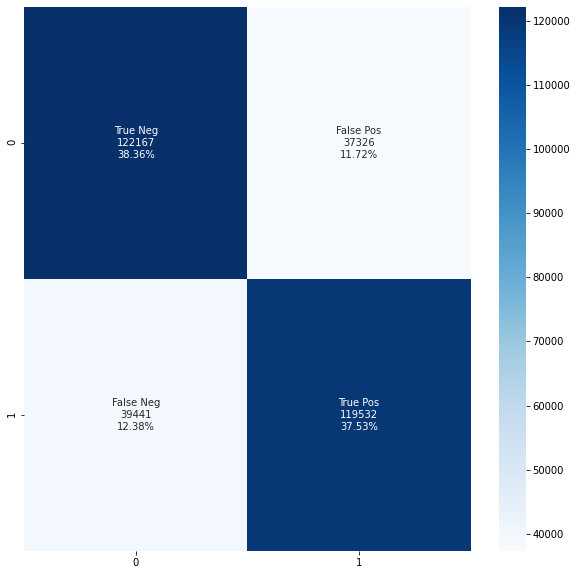

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

cf_matrix = confusion_matrix(test_data['label'], y_prediction)
print(cf_matrix)

plt.figure(figsize = (10,10))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [47]:
print(classification_report(test_data['label'], y_prediction))

              precision    recall  f1-score   support

    Negative       0.76      0.77      0.76    159493
    Positive       0.76      0.75      0.76    158973

    accuracy                           0.76    318466
   macro avg       0.76      0.76      0.76    318466
weighted avg       0.76      0.76      0.76    318466

